## Lead Scoring Case Study

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# To display all the columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# This library will be required to split the data set into train and test sets respectively.
from sklearn.model_selection import train_test_split

# This will be required to scale the data.
from sklearn.preprocessing import StandardScaler

# Importing STATS MODEL
import statsmodels.api as sm

# Import VIF module
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing RFE and LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score,precision_recall_curve


In [2]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the Data

In [3]:
#Importing Leads.csv

lead_data = pd.read_csv('./Dataset/Leads.csv')
lead_data.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Normal check of lead_data

In [4]:
#checking tail of the data
lead_data.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [5]:
#checking Shape of the data
lead_data.shape

(9240, 37)

In [6]:
#Summary of given data set 
lead_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [7]:
#Checking for duplicate rows
sum(lead_data.duplicated(subset = 'Prospect ID'))

0

- No Duplicate values present with in lead_data

In [8]:
#Inforamation of data
lead_data.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Cleaning Steps & EDA

### 1. Handling Categorical Variables with "Select" values
- We can notice that there are many 'Select' values present in multiple categorical columns
- This might have happened because these fields in the website might be non mandatory fields with drop downs options for the customer to choose from.
- Amongst the dropdown values, the default option is probably 'Select' and since these aren't mandatory fields, many customer might have chosen to leave it as the default value 'Select'.
- And customer did not select any option from that list, hence it shows as select.
- So its equivalent to Null value. Thererfore we'll treat it as null value or else we will check if we can impute some other values inplace of it.

#### Visualising the categorical columns with "Select" values

In [9]:
#Function for plotting graphs 
#Function to show labels in bar plots

def showLabels(ax, d=None):
    plt.margins(0.5, 0.5)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [10]:
# Checking unique values of column 'Specialization'.
lead_data['Specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

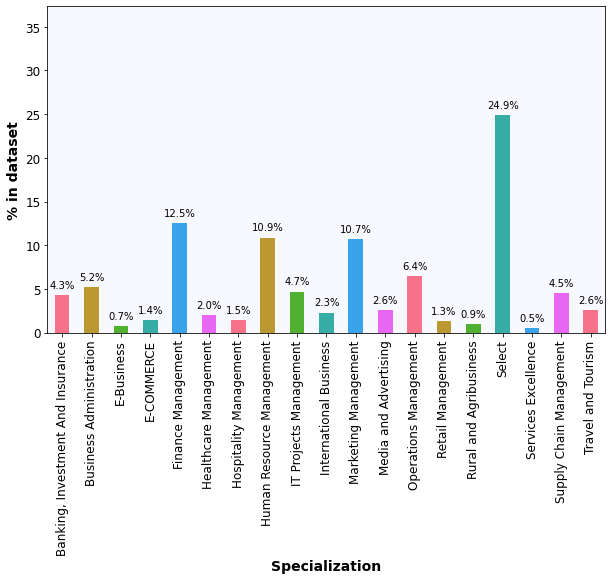

In [11]:
# Visualising the column 'Specialization'

fig = plt.figure(figsize = (10,6))
values = (lead_data['Specialization'].value_counts(normalize=True)*100)
values = values.sort_index()
ax = values.plot.bar(color=sns.color_palette('husl'))
ax.set_ylabel('% in dataset', fontsize=14, fontweight = 'bold')
ax.set_xlabel('Specialization', fontsize=14, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.tick_params(axis='both', which='major', labelsize=12)
ax.set_facecolor("ghostwhite")
showLabels(ax)

#### Inference:
This perticular column tells about the industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.

- It maybe the case that customer has not entered any specialization if his/her option is not availabe on the list,
- As customer may not have any specialization or is a student.
- Hence we can make a category "Others" inplace of Select

In [12]:
# In Specialization column let's convert the 'Select' to 'Others'
lead_data["Specialization"].replace({"Select": "Others"}, inplace=True)

In [13]:
# Checking unique values of column 'How did you hear about X Education'.
lead_data['How did you hear about X Education'].unique()

array(['Select', 'Word Of Mouth', 'Other', nan, 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

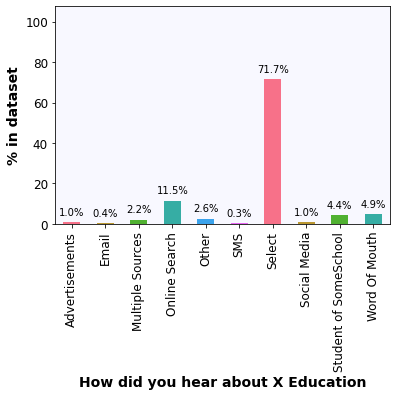

In [14]:
# Visualising the column 'How did you hear about X Education'
values = (lead_data['How did you hear about X Education'].value_counts(normalize=True)*100)
values = values.sort_index()
ax = values.plot.bar(color=sns.color_palette('husl'))
ax.set_ylabel('% in dataset', fontsize=14, fontweight = 'bold')
ax.set_xlabel('How did you hear about X Education', fontsize=14, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.tick_params(axis='both', which='major', labelsize=12)
ax.set_facecolor("ghostwhite")
showLabels(ax)

#### Inference:
The column tell us about The source from which the customer heard about X Education.

- Here 'Select' is not a value, looks like the user has missed a field.
- The column 'How did you hear about X Education' have a lot of rows (more than 70%) which have the value Select which is of no use to the analysis so it's better that we treat them as null values.

In [15]:
# Checking unique values of column 'Lead Profile'.
lead_data['Lead Profile'].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

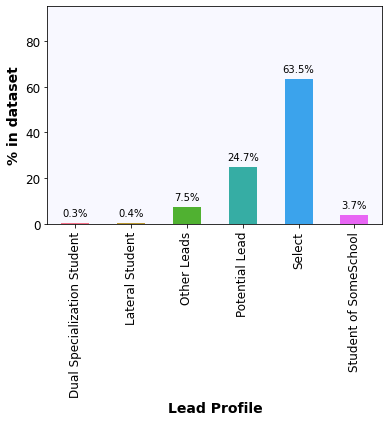

In [16]:
# Visualising the column 'Lead Profile'

values = (lead_data['Lead Profile'].value_counts(normalize=True)*100)
values = values.sort_index()
ax = values.plot.bar(color=sns.color_palette('husl'))
ax.set_ylabel('% in dataset', fontsize=14, fontweight = 'bold')
ax.set_xlabel('Lead Profile', fontsize=14, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.tick_params(axis='both', which='major', labelsize=12)
ax.set_facecolor("ghostwhite")
showLabels(ax)

#### Inference:
The above column 'Lead Profile' tell us about A lead level assigned to each customer based on their profile.

- Here 'Select' is not a value, looks like the user has missed a field
- The column 'Lead Profile' have a lot of rows (more than 60%) which have the value Select which is of no use to the analysis so it's better that we treat them as null values.

In [17]:
# Checking unique values of column 'City'.
lead_data['City'].unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

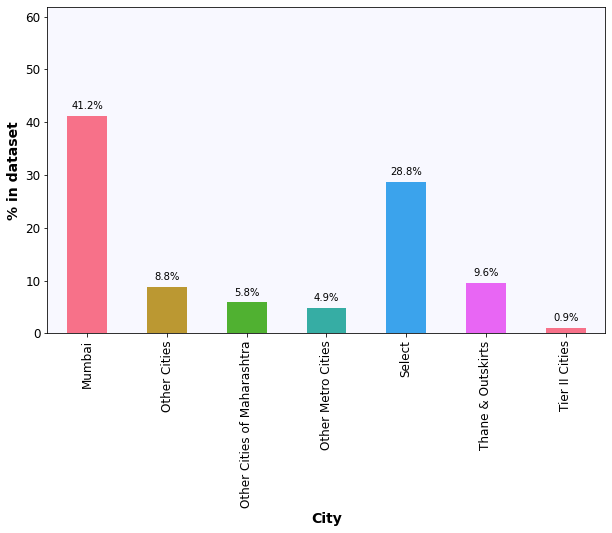

In [18]:
# Visualising the column 'City'

fig = plt.figure(figsize = (10,6))
values = (lead_data['City'].value_counts(normalize=True)*100)
values = values.sort_index()
ax = values.plot.bar(color=sns.color_palette('husl'))
ax.set_ylabel('% in dataset', fontsize=14, fontweight = 'bold')
ax.set_xlabel('City', fontsize=14, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.tick_params(axis='both', which='major', labelsize=12)
ax.set_facecolor("ghostwhite")
showLabels(ax)

#### Inference:
The above column 'City' tell us about The city of the customer that he belongs to.

- Majority of the customers are from Mumbai.
- Here 'Select' is not a value, looks like the user has missed a field.
- We will treat Select as Null Values.

In [19]:
#Let's make all the 'Select' to NAN
lead_data = lead_data.replace('Select', np.nan)

In [20]:
#Now to check whether we have any 'Select' left or not
lead_data1 = lead_data.copy()
lead_data1 = lead_data1.astype(str)
lst = list(lead_data1)
for i in lst:
    length = len(lead_data1[lead_data1[i] == 'Select'])
    if length == 0:
        print('There is no Select')
        break

There is no Select


### 2. Missing values treatment

#### Count and Percentage of Missing Values

In [21]:
# Checking Column-wise Total Count and Percentage of Missing Values
count = pd.DataFrame(lead_data.isnull().sum().sort_values(ascending=False), columns=['null_counts'])
percent = pd.DataFrame(round(100*(lead_data.isnull().sum()/lead_data.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['null_percentage'])
Missing_Value_Table = pd.concat([count, percent], axis = 1)
Missing_Value_Table

,null_counts,null_percentage
How did you hear about X Education,7250,78.46
Lead Profile,6855,74.19
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Asymmetrique Activity Index,4218,45.65
City,3669,39.71
Tags,3353,36.29
What matters most to you in choosing a course,2709,29.32


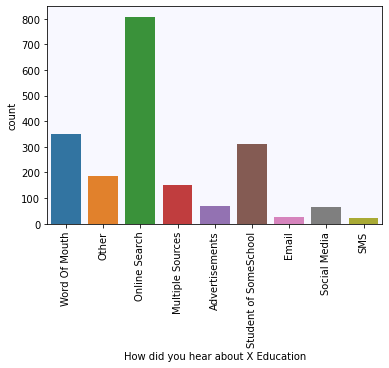

In [22]:
# Visualising the columns having more than 70% null values
# Plotting the other values of column 'How did you hear about X Education' 

sns.countplot(lead_data['How did you hear about X Education']).set_facecolor("ghostwhite")
xticks(rotation = 90)
plt.show()

In [23]:
lead_data['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [24]:
lead_data['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [25]:
# Above two columns 'How did you hear about X Education' & 'Lead Profile' have 78.46% and 74.19% null values
# We will drop these columns as these are not important to our analysis.

lead_data.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [26]:
# Checking unique values of column 'Lead Quality'.
lead_data['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [27]:
# From Missing_Value_Table we can observe that the column "Lead Quality" have 51.59% of missing values.
# Lead Quality: Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead

lead_data['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

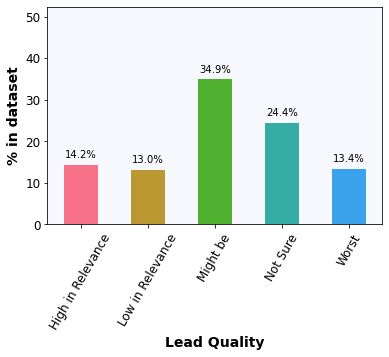

In [28]:
values = (lead_data['Lead Quality'].value_counts(normalize=True)*100)
values = values.sort_index()
ax = values.plot.bar(color=sns.color_palette('husl'))
ax.set_ylabel('% in dataset', fontsize=14, fontweight = 'bold')
ax.set_xlabel('Lead Quality', fontsize=14, fontweight = 'bold')
plt.xticks(rotation = 60)
plt.tick_params(axis='both', which='major', labelsize=12)
ax.set_facecolor("ghostwhite")
showLabels(ax)

#### Inference:
- As we see from Missing_Value_Table, we have a lot of missing values in 'Lead Quality' column. Imputing values for such a high number of nulls would lead to biased results.
- So, lets drop the column 'Lead Quality' that have >50% missing value.

In [29]:
# Dropping Column 'Lead Quality'

lead_data.drop(['Lead Quality'], axis = 1, inplace = True)

#### Visualising Asymmetrique Activity Index and Score Columns

02.Medium    76.443648
01.High      16.348068
03.Low        7.208284
Name: Asymmetrique Activity Index, dtype: float64


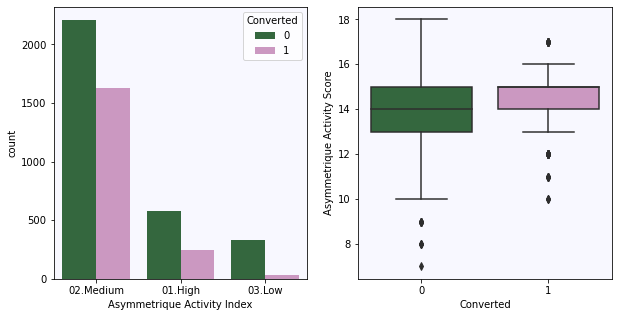

In [30]:
print(lead_data['Asymmetrique Activity Index'].value_counts(normalize=True)*100)

fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x = "Asymmetrique Activity Index", hue = "Converted", 
              data = lead_data, palette=("cubehelix")).set_facecolor("ghostwhite")

plt.subplot(1,2,2)
sns.boxplot(y = 'Asymmetrique Activity Score', x = 'Converted', 
            data = lead_data, palette=("cubehelix")).set_facecolor("ghostwhite")

#### Inference :
- Both the cases (for 'Asymmetrique Activity Index' column) when Converted = 1 and 0, 'Medium' is the most frequent value. It also looks like that the 'Asymmetrique Activity Score' column has very less predictive power

#### Visualising Asymmetrique Profile Index and Score Columns

02.Medium    55.515731
01.High      43.866985
03.Low        0.617284
Name: Asymmetrique Profile Index, dtype: float64


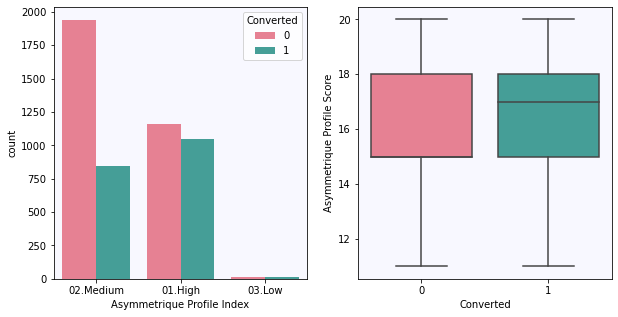

In [31]:
print(lead_data['Asymmetrique Profile Index'].value_counts(normalize=True)*100)

fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x = "Asymmetrique Profile Index", hue = "Converted", 
              data = lead_data, palette=("husl")).set_facecolor("ghostwhite")

plt.subplot(1,2,2)
sns.boxplot(y = 'Asymmetrique Profile Score', x = 'Converted', 
            data = lead_data, palette=("husl")).set_facecolor("ghostwhite")

#### Inference:
Surely the 'Asymmetrique Profile Score' column has not much predictive power.

#### Conclusions:
- Below features represents an index and score assigned to each customer based on their activity and their profile and contains 45.61% of null values
    - Asymmetrique Activity Index  
    - Asymmetrique Profile Index      
    - Asymmetrique Activity Score     
    - Asymmetrique Profile Score   

- These feature does not seems to be very reliable as there are many outliers, hence too much variation in the data.
- So We will remove these columns as there are almost 46 percent null values which is very high.

In [32]:
#Let's drop the above mentioned Asymmetrique columns, due to their very high null values.

lead_data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score',
                   'Asymmetrique Profile Index','Asymmetrique Profile Score'], axis = 1, inplace = True)

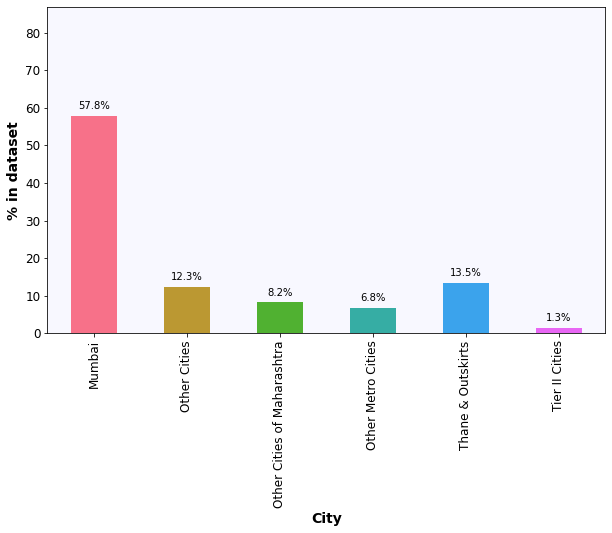

In [33]:
# Visualising the column 'City'

fig = plt.figure(figsize = (10,6))
values = (lead_data['City'].value_counts(normalize=True)*100)
values = values.sort_index()
ax = values.plot.bar(color=sns.color_palette('husl'))
ax.set_ylabel('% in dataset', fontsize=14, fontweight = 'bold')
ax.set_xlabel('City', fontsize=14, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.tick_params(axis='both', which='major', labelsize=12)
ax.set_facecolor("ghostwhite")
showLabels(ax)

#### Inference:
- Around 60% of the data is Mumbai.
- We can observe from Missing_Value_Table it has around ~ 40% missing values which is quite high so any imputation can make data biased and unstable.
- The variable City won't be of any use in our analysis. So it's best that we drop it.

In [34]:
#  Dropping feature 'City'

lead_data.drop(['City'], axis = 1, inplace = True)

In [35]:
# Checking unique values of column 'Tags'.
lead_data['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [36]:
# Tags assigned to customers indicating the current status of the lead.
# Tags column have 36.29% of null values 
lead_data.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

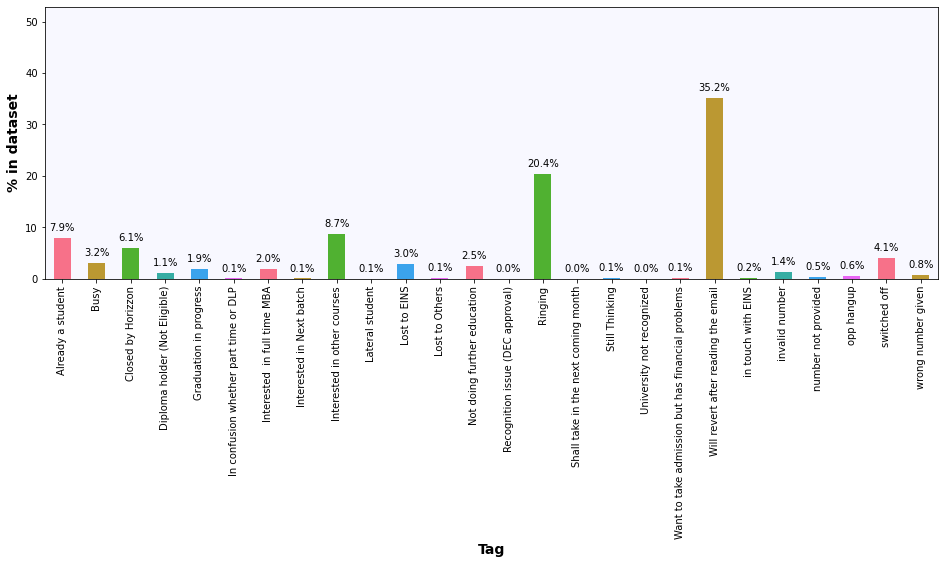

In [37]:
# Visualising the Feature 'Tags'

fig = plt.figure(figsize = (16,5))
values = (lead_data['Tags'].value_counts(normalize=True)*100)
values = values.sort_index()
ax = values.plot.bar(color=sns.color_palette('husl'))
ax.set_ylabel('% in dataset', fontsize=14, fontweight = 'bold')
ax.set_xlabel('Tag', fontsize=14, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.tick_params(axis='both', which='major', labelsize=10)
ax.set_facecolor("ghostwhite")
showLabels(ax)

#### Inference:
Tags assigned to customers indicating the current status of the lead.Hence it is a manually added column.

- Around 35% of data is 'will rever after reading the mail'.
- We can observe from the Missing_Value_Table the Tags column have 36.29% of null values.
- So imputing dummy value can lead to overpopulate the data, therefore we decide to drop it.

In [38]:
#  Dropping feature 'Tags'

lead_data.drop(['Tags'], axis = 1, inplace = True)

In [39]:
# 'What matters most to you in choosing a course' coloumn have 29.32% null values 
lead_data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [40]:
#Checking unique data.
lead_data["What matters most to you in choosing a course"].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

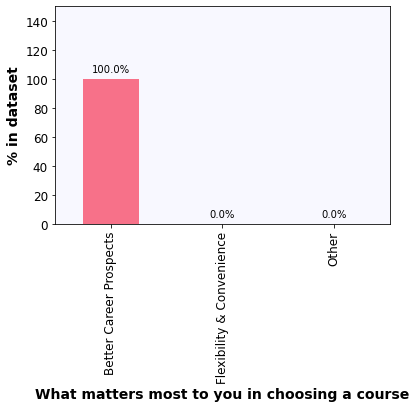

In [41]:
# Visualising column 'What matters most to you in choosing a course'

values = (lead_data['What matters most to you in choosing a course'].value_counts(normalize=True)*100)
values = values.sort_index()
ax = values.plot.bar(color=sns.color_palette('husl'))
ax.set_ylabel('% in dataset', fontsize=14, fontweight = 'bold')
ax.set_xlabel('What matters most to you in choosing a course', fontsize=14, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.tick_params(axis='both', which='major', labelsize=12)
ax.set_facecolor("ghostwhite")
showLabels(ax)

#### Inference:
Almost 100% value is 'Better Career Prospects'. Surely this columne will not have any significant impact on our modelling. So, better to drop this column to reduce the dimensionality.

In [42]:
# Since majority of the values in 'What matters most to you in choosing a course' column has 'Better Career Prospects', 
# Dropping the column 
lead_data.drop(["What matters most to you in choosing a course"], axis = 1, inplace=True)

In [43]:
#'What is your current occupation' coloumn have 29.11% null values
lead_data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [44]:
# Checking unique values.
lead_data["What is your current occupation"].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

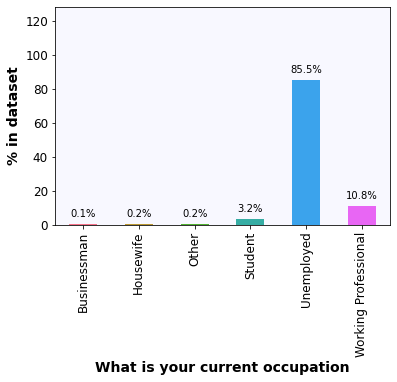

In [45]:
# Visualising column 'What matters most to you in choosing a course'

values = (lead_data['What is your current occupation'].value_counts(normalize=True)*100)
values = values.sort_index()
ax = values.plot.bar(color=sns.color_palette('husl'))
ax.set_ylabel('% in dataset', fontsize=14, fontweight = 'bold')
ax.set_xlabel('What is your current occupation', fontsize=14, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.tick_params(axis='both', which='major', labelsize=12)
ax.set_facecolor("ghostwhite")
showLabels(ax)

#### Inference:
- Occupation indicates if the customer is student,employed or unemployed. 
- From Missing_Value_Table we can also notice 29.11% missing values.
- Unemployed leads are the most in terms of Absolute numbers.
- Almost 86% entries are of Unemployed So, it is quite possible that this column will not be of much value for our modelling. For the time being we will impute the missing values with 'Unemployed' and move ahead.

In [46]:
# 86% entries are of Unemployed so we can impute "Unemployed" in it.

lead_data['What is your current occupation'].replace(np.nan, 'Unemployed', inplace=True)

In [47]:
#Country coloumn have 26.63% null values 

lead_data['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [48]:
#Checking unique data.
lead_data["Country"].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [49]:
# The Country variable has 26.63% values as null and out of the remaining, maximum values are India. 
# Country is India for around 96% of data
# So this variable does not add any variance to our data and hence can be dropped
# The variable Country won't be of any use in our analysis. So it's best that we drop it.

lead_data.drop(["Country"], axis = 1, inplace=True)

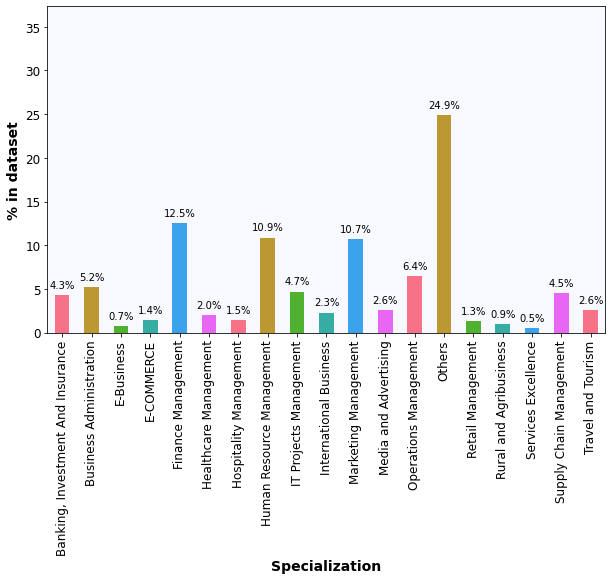

In [50]:
# Visualising for the missing values on the column 'Specialization'

fig = plt.figure(figsize = (10,6))
values = (lead_data['Specialization'].value_counts(normalize=True)*100)
values = values.sort_index()
ax = values.plot.bar(color=sns.color_palette('husl'))
ax.set_ylabel('% in dataset', fontsize=14, fontweight = 'bold')
ax.set_xlabel('Specialization', fontsize=14, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.tick_params(axis='both', which='major', labelsize=12)
ax.set_facecolor("ghostwhite")
showLabels(ax)

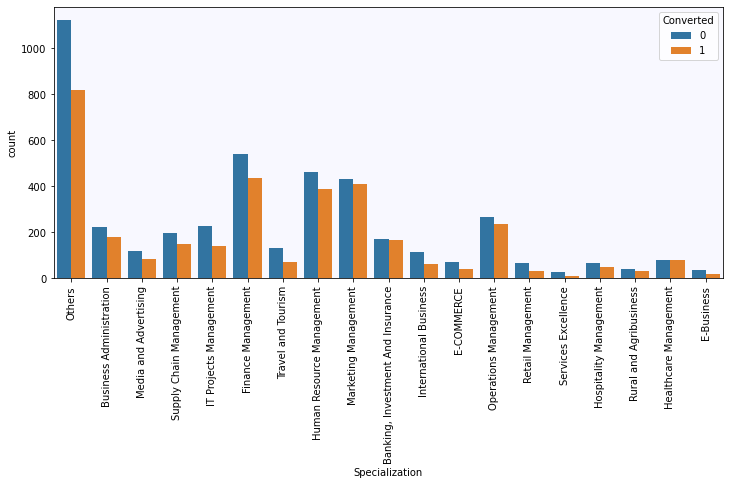

In [51]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data).set_facecolor("ghostwhite")
xticks(rotation = 90)
plt.show()

#### Inference:
- Here in case of the 'Specialization' column, the distribution of values are almost same in case of Converted = 0 & 1
- The most frequent value is 'Others' & second and third most frequent are 'Finance Management' and 'Human Resource Management'
- These two values 'Finance Management' and 'Human Resource Management' are so similar in number it might be risky to impute the missing value by only either of the two.
- That is why a better strategy would be to replace the NAN values with 'Others' category. 

In [52]:
# Replacing Null values of 'Specialization' column with others category.

lead_data['Specialization'].replace(np.nan, 'Others', inplace=True)

In [53]:
# From Missing_Value_Table we can observe columns 'TotalVisits' & 'Page Views Per Visit' have 1.48% of missing values
lead_data['TotalVisits'].describe(include=all)

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [54]:
lead_data['Page Views Per Visit'].describe(include=all)

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

#### Conclusions:
- From Missing_Value_Table we can observe columns 'TotalVisits' & 'Page Views Per Visit' have 1.48% of missing values.
- Imputing with Median values because these continuous variables have outliers..

In [55]:
lead_data['TotalVisits'].replace(np.NaN, lead_data['TotalVisits'].median(), inplace =True)

In [56]:
lead_data['Page Views Per Visit'].replace(np.NaN, lead_data['Page Views Per Visit'].median(), inplace =True)

In [57]:
# Analysing Feature 'Last Activity'

lead_data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

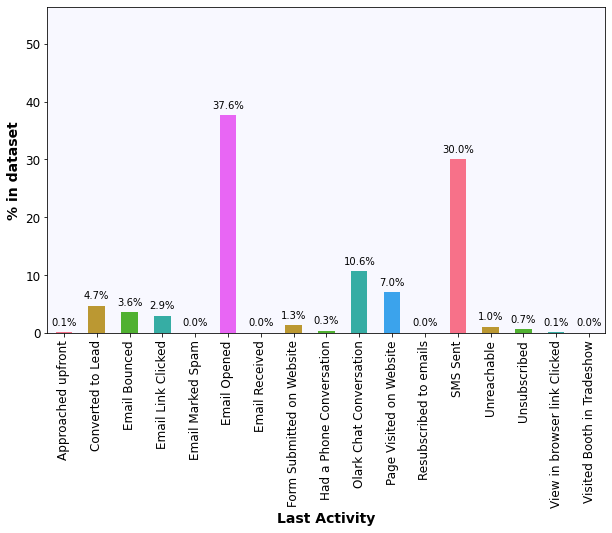

In [58]:
# Visualising column 'Last Activity'

fig = plt.figure(figsize = (10,6))
values = (lead_data['Last Activity'].value_counts(normalize=True)*100)
values = values.sort_index()
ax = values.plot.bar(color=sns.color_palette('husl'))
ax.set_ylabel('% in dataset', fontsize=14, fontweight = 'bold')
ax.set_xlabel('Last Activity', fontsize=14, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.tick_params(axis='both', which='major', labelsize=12)
ax.set_facecolor("ghostwhite")
showLabels(ax)

#### Inference:
- From Missing_Value_Table we can observe column 'Last Activity' has 1.11 % missing values
- From above analysis we can see the most frequent value is Email Opened(3437)
- We will impute this column by most frequent data.

In [59]:
# From Missing_Value_Table we can observe column 'Last Activity' has 1.11 % missing values
# From above analysis we can see the most frequent value is Email Opened(3437 i.e. 37.6%)
# We will impute this column by most frequent data.

lead_data['Last Activity'] =  lead_data['Last Activity'].fillna(lead_data['Last Activity'].value_counts().idxmax())

In [60]:
# Analysing Feature 'Lead Source'

lead_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
blog                    1
WeLearn                 1
Pay per Click Ads       1
testone                 1
welearnblog_Home        1
youtubechannel          1
NC_EDM                  1
Name: Lead Source, dtype: int64

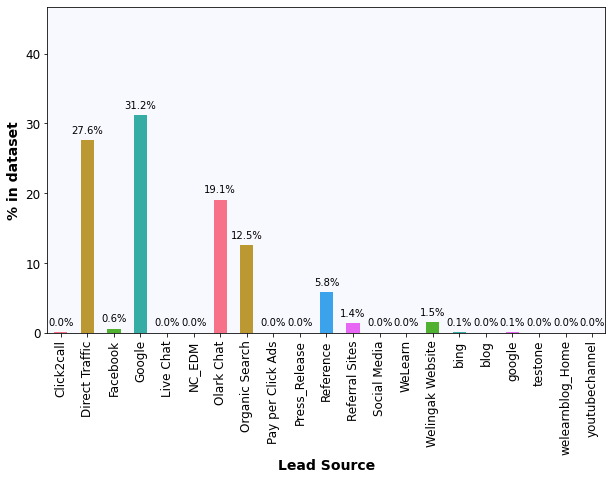

In [61]:
# Visualising column 'Lead Source'

fig = plt.figure(figsize = (10,6))
values = (lead_data['Lead Source'].value_counts(normalize=True)*100)
values = values.sort_index()
ax = values.plot.bar(color=sns.color_palette('husl'))
ax.set_ylabel('% in dataset', fontsize=14, fontweight = 'bold')
ax.set_xlabel('Lead Source', fontsize=14, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.tick_params(axis='both', which='major', labelsize=12)
ax.set_facecolor("ghostwhite")
showLabels(ax)

#### Inference:
- Google is the most frequent value 31.2% followed by Direct Traffic 27.6% and Olark Chat 19.1%.
- As observed form Missing_Value_Table that this column 'Lead Source' have 0.39% of null values present.
- We can either impute it by most frequent value Google or we can drop row with null values.
- 'google' is redundant. Seems like there are two entries for google.

In [62]:
# As column 'Lead Source' has very less null value, we'll imputed with most frequent value

lead_data['Lead Source'] =  lead_data['Lead Source'].fillna(lead_data['Lead Source'].value_counts().idxmax())

In [63]:
# Also it Seems like there are two entries for google, with case difference, lets merge the same:

lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')

In [64]:
# Again Checking the Count of missing values

round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

Our data is cleaned now and we can start with analysis part

In [65]:
# Re-examing the data frame shape
lead_data.shape

(9240, 26)

### Exploratory Data Analysis
### Univariate Analysis

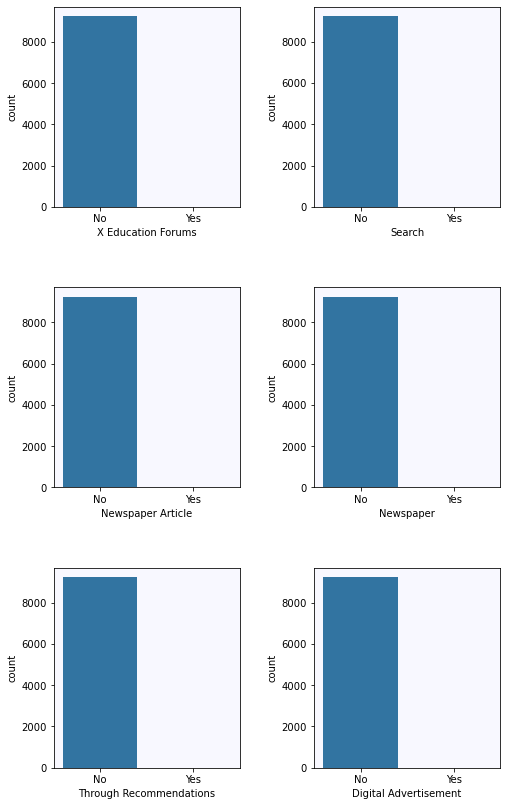

In [66]:
fig = plt.figure(figsize= (8,14))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(3, 2, 1)
sns.countplot(x='X Education Forums', data=lead_data).set_facecolor("ghostwhite")

plt.subplot(3, 2, 2)
sns.countplot(x='Search', data=lead_data).set_facecolor("ghostwhite")

plt.subplot(3, 2, 3)
sns.countplot(x='Newspaper Article', data=lead_data).set_facecolor("ghostwhite")

plt.subplot(3, 2, 4)
sns.countplot(x='Newspaper', data=lead_data).set_facecolor("ghostwhite")

plt.subplot(3, 2, 5)
sns.countplot(x='Through Recommendations', data=lead_data).set_facecolor("ghostwhite")

plt.subplot(3, 2, 6)
sns.countplot(x='Digital Advertisement', data=lead_data).set_facecolor("ghostwhite")

#### Inference:
- Above are the columns where we have extremely high perecentage of only one value. Better to remove these, as these will not have insignificant predictive power.

In [67]:
#Checking distribution of values in 'X Education Forums' column
print('Percentage of values:')
lead_data['X Education Forums'].value_counts()*100/lead_data['X Education Forums'].value_counts().sum()

Percentage of values:


No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

In [68]:
#Checking distribution of values in 'Search' column
print('Percentage of values:')
lead_data['Search'].value_counts()*100/lead_data['Search'].value_counts().sum()

Percentage of values:


No     99.848485
Yes     0.151515
Name: Search, dtype: float64

In [69]:
#Checking distribution of values in 'Newspaper Article' column
print('Percentage of values:')
lead_data['Newspaper Article'].value_counts()*100/lead_data['Newspaper Article'].value_counts().sum()

Percentage of values:


No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

In [70]:
#Checking distribution of values in 'Newspaper' column
print('Percentage of values:')
lead_data['Newspaper'].value_counts()*100/lead_data['Newspaper'].value_counts().sum()

Percentage of values:


No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

In [71]:
#Checking distribution of values in 'Through Recommendations' column
print('Percentage of values:')
lead_data['Through Recommendations'].value_counts()*100/lead_data['Through Recommendations'].value_counts().sum()

Percentage of values:


No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

In [72]:
#Checking distribution of values in 'Digital Advertisement' column
print('Percentage of values:')
lead_data['Digital Advertisement'].value_counts()*100/lead_data['Digital Advertisement'].value_counts().sum()

Percentage of values:


No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

In [73]:
#Let's dropp the above columns
lead_data.drop(['X Education Forums', 'Search', 'Newspaper Article', 'Newspaper', 
                'Through Recommendations', 'Digital Advertisement'], axis = 1, inplace = True)

In [74]:
lead_data.shape

(9240, 20)

In [75]:
#Before moving on, Lets check the unique value counts for few more variables
print('Unique Update me on Supply Chain Content: ',
      len(lead_data['Update me on Supply Chain Content'].value_counts())) #All No

print('Unique Receive More Updates About Our Courses: ',
      len(lead_data['Receive More Updates About Our Courses'].value_counts())) #All No

print('Unique Get updates on DM Content: ',
      len(lead_data['Get updates on DM Content'].value_counts())) #All No

print('Unique I agree to pay the amount through cheque: ',
      len(lead_data['I agree to pay the amount through cheque'].value_counts())) #All No

print('Unique Magazine: ',
      len(lead_data['Magazine'].value_counts())) #All No

Unique Update me on Supply Chain Content:  1
Unique Receive More Updates About Our Courses:  1
Unique Get updates on DM Content:  1
Unique I agree to pay the amount through cheque:  1
Unique Magazine:  1


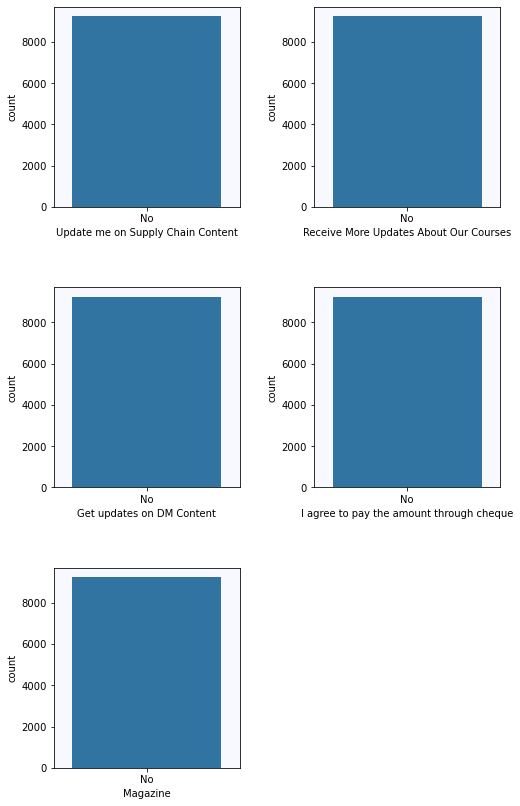

In [76]:
fig = plt.figure(figsize= (8,14))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(3, 2, 1)
sns.countplot(x='Update me on Supply Chain Content', data=lead_data).set_facecolor("ghostwhite")

plt.subplot(3, 2, 2)
sns.countplot(x='Receive More Updates About Our Courses', data=lead_data).set_facecolor("ghostwhite")

plt.subplot(3, 2, 3)
sns.countplot(x='Get updates on DM Content', data=lead_data).set_facecolor("ghostwhite")

plt.subplot(3, 2, 4)
sns.countplot(x='I agree to pay the amount through cheque', data=lead_data).set_facecolor("ghostwhite")

plt.subplot(3, 2, 5)
sns.countplot(x='Magazine', data=lead_data).set_facecolor("ghostwhite")

#### Inference:
- As we can observe from above that the columns 'Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Magazine' form them all the values are "No".
- So we have only one value for above variables in our data set. This does not affect the Coversion of a Lead as there is no variance. Hence we can drop these variables too

In [77]:
lead_data.drop(['Update me on Supply Chain Content','Receive More Updates About Our Courses',
                      'Get updates on DM Content','I agree to pay the amount through cheque','Magazine'],axis=1, inplace=True)

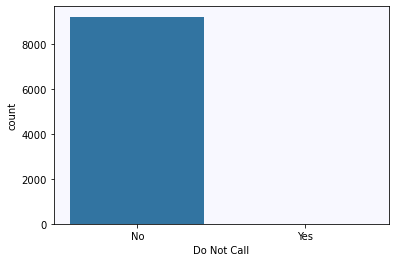

In [78]:
# Visualising feature 'Do Not Call'
sns.countplot(lead_data['Do Not Call']).set_facecolor("ghostwhite")

In [79]:
#Checking distribution of values in 'Do Not Call' column
print('Percentage of values:')
lead_data['Do Not Call'].value_counts()*100/lead_data['Do Not Call'].value_counts().sum()

Percentage of values:


No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

#### Inference:
From the above analysis we can observe
- For Column 'Do Not Call' Most of the values are "No"(almost 100%), so we can drop this column also.

In [80]:
# Dropping the column 
lead_data.drop(['Do Not Call'], axis = 1, inplace = True)

#### Converted
- Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).

In [81]:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

38.53896103896104

#### Visualizing data for column 'Lead Origin' with respect to Target Variable 'Converted'

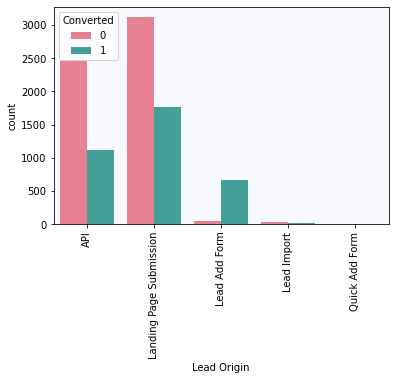

In [82]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data, palette=("husl")).set_facecolor("ghostwhite")
xticks(rotation = 90)
plt.show()

#### Inference:
- Landing Page Submission and API have around 30-35% conversion rate but count of lead generated from them are considerable.
- Lead Add Form has more than 90% conversion rate but count of lead are not very high.
- Lead Import are very less in count.

#### Visualize data for column 'Lead Source' with respect to Target Variable 'Converted

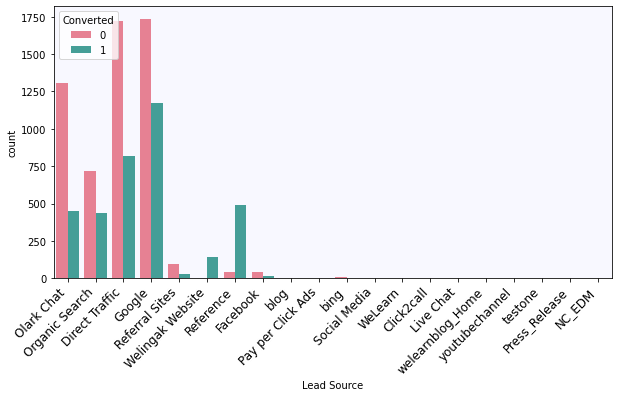

In [83]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45,fontsize=12,horizontalalignment='right')
sns.countplot(lead_data['Lead Source'], hue=lead_data.Converted, palette=("husl")).set_facecolor("ghostwhite")
plt.show()

#### Inference:
- Columns like 'Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release','Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel' have very less lead numbers. Grouping them together as 'Others'.

In [84]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 
                                                             'Press_Release', 'Social Media', 'WeLearn', 'bing', 'blog', 
                                                             'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

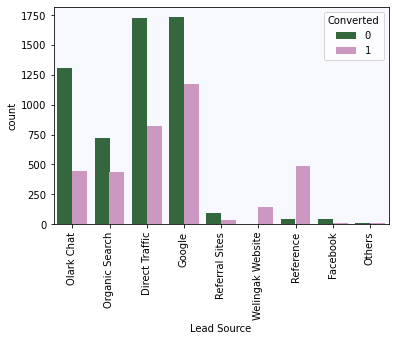

In [85]:
# Again visualising the column "Lead Source"
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data, palette=("cubehelix")).set_facecolor("ghostwhite")
xticks(rotation = 90)
plt.show()

#### Conclusion:
- Maximum number of leads are generates from Google and Direct traffic.
- Reference leads and leads through welingak website is having high Rate of Conversion.

If we want to improve overall lead conversion rate, we should be concentrating more on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

#### Visualize the data for column 'Do not Email' with respect to the Target variable

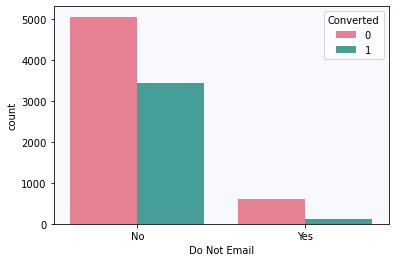

In [86]:
#Analysing number of cutomers converted from Responces Do Not Email
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data, palette=("husl")).set_facecolor("ghostwhite")

#### Inference:
- We see that people who have not opted for this service have a low conversion rate

#### Visualizing the data for column 'Last Activity'

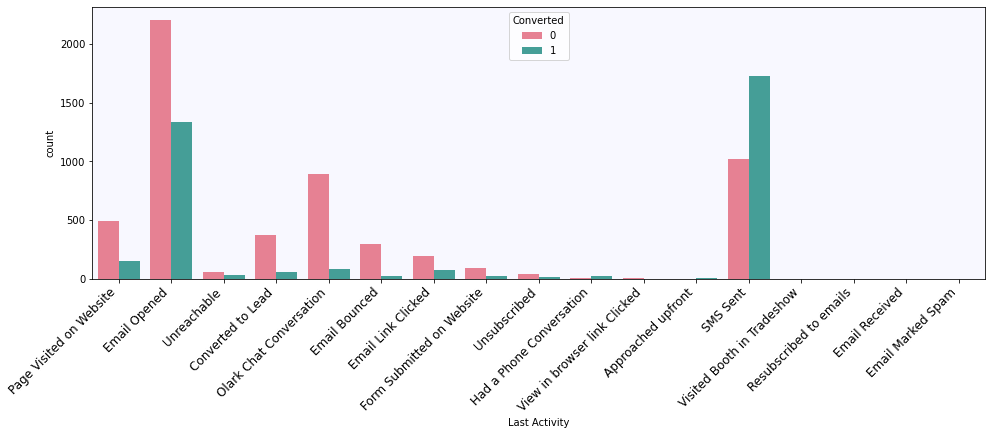

In [87]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=45,fontsize=12,horizontalalignment='right')
sns.countplot(x = "Last Activity", hue = lead_data.Converted, data = lead_data, palette=("husl")).set_facecolor("ghostwhite")
plt.show()

In [88]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'],
                                                                'Other_Activity')

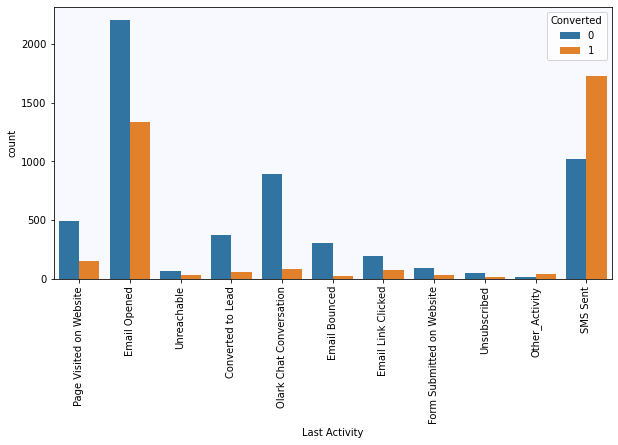

In [89]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data).set_facecolor("ghostwhite")
xticks(rotation = 90)
plt.show()

#### Inference:
- Most of the leads have Email_opened as their last activity. The rate of conversion of the customers whose last activity is Email_opened or SMS_Sent is higher.

In [90]:
# Analysing Feature 'Lead Number'
lead_data['Lead Number'].describe()

count      9240.000000
mean     617188.435606
std       23405.995698
min      579533.000000
25%      596484.500000
50%      615479.000000
75%      637387.250000
max      660737.000000
Name: Lead Number, dtype: float64

In [91]:
# Analysing Feature A free copy of Mastering The Interview'
lead_data['A free copy of Mastering The Interview'].describe()

count     9240
unique       2
top         No
freq      6352
Name: A free copy of Mastering The Interview, dtype: object

#### Conclusion:
- Most entries are 'No'. No Inference can be drawn with these parameter.

In [92]:
lead_data.drop(['Lead Number','A free copy of Mastering The Interview'],axis=1,inplace=True)

#### Visualising Numerical columns

In [93]:
# Visualising feature 'TotalVisits'
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

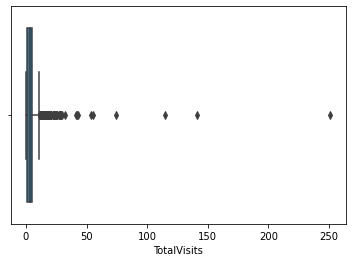

In [94]:
sns.boxplot(lead_data['TotalVisits'])
plt.show()

#### Infernece:
- As we can see there are a number of outliers in the data.
- We will cap the outliers to 95% value for further analysis.

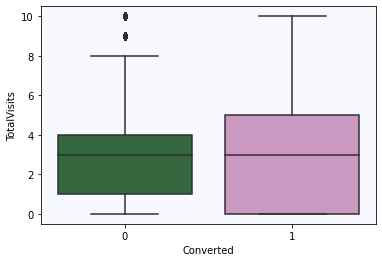

In [95]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data, palette=("cubehelix")).set_facecolor("ghostwhite")
plt.show()

- We are not able to conclude anything here as median for converted and not converted leads are the same.

In [96]:
# Visualising feature 'Total Time Spent on Website'
lead_data['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

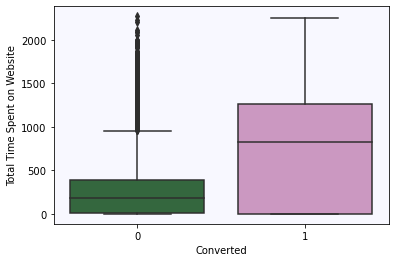

In [97]:
# Visualising feature 'Total Time Spent on Website' with respect to 'Converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data, 
            palette=("cubehelix")).set_facecolor("ghostwhite")

#### Inference:

- Leads spending more time on the weblise are more likely to be converted. Improvement in website to make it more user helpful and improver user experience and to keep them engaged on the website is recommended

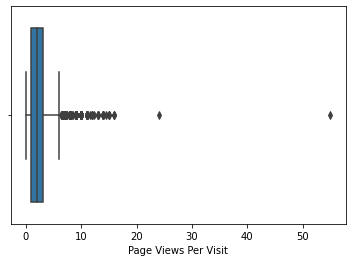

In [98]:
# Visualize data for column Page views per visit
sns.boxplot(lead_data['Page Views Per Visit'])
plt.show()

#### Inference:
- As we can see there are a number of outliers in the data.
- We will cap the outliers to 95% value for further analysis.

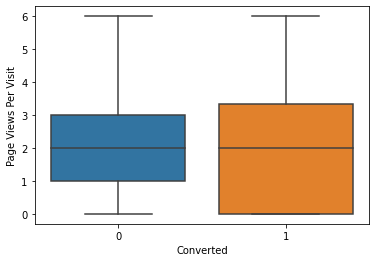

In [99]:
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_data)
plt.show()

- We are not able to conclude anything here as median for converted and not converted leads are the same.

In [100]:
lead_data.shape

(9240, 12)

In [101]:
# checking percentage of retained rows here
100*(len(lead_data.index)/9240)

100.0

In [102]:
lead_data.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [103]:
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Modified


### Data Preparation steps

#### Converting some binary variables (Yes/No) to (1/0) 1: Yes / 0:No

In [104]:
# List of binary variables to map
varlist =  ['Do Not Email']

# standardize values by converting all to lower case
lead_data[varlist] = lead_data[varlist].applymap(lambda s : s.lower() if type(s) == str else s)

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

#### Creating Dummy for Nominal Categorical Variables with Multiple levels.

In [105]:
# Creating a dummy variable for the nominal categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [106]:
# Concating the results to the master dataframe
data = pd.concat([lead_data, dummy1], axis=1)
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [107]:
# Dropping original variables
data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                  'Last Notable Activity'], axis = 1, inplace=True)

In [108]:
data.shape

(9240, 66)

In [109]:
# Let's take a look at the dataset again

data.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Train-Test Split
The next step is to split the dataset into training and testing sets.

In [110]:
# Putting feature variable to X
X = data.drop(['Prospect ID','Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [111]:
# Putting response variable to y
y = data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [112]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling
Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [113]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                    'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.299722,0.005716,-0.516439,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0,0.662077,-0.691418,0.143543,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0,0.662077,1.365219,1.553761,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [114]:
# Checking the Churn Rate
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

38.53896103896104

### Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

#### RFE
Recursive feature elimination

In [115]:
#from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#from sklearn.feature_selection import RFE
# running RFE and selecting 15 features best describing churn
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [116]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 48),
 ('Lead Origin_Quick Add Form', False, 25),
 ('Lead Source_Facebook', False, 37),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Others', False, 22),
 ('Lead Source_Reference', False, 18),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 27),
 ('Last Activity_Email Opened', False, 3),
 ('Last Activity_Form Submitted on Website', False, 40),
 ('Last Activity_Olark Chat Conversation', False, 10),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 41),
 ('Last Activity_

In [117]:
# Put all the columns selected by RFE in the variable 'col'
#Lets see the columns that RFE supports 
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [118]:
# Lets see the variables the are rejected by RFE - 
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'S

In [119]:
# Creating X_test dataframe with RFE selected variables
# Select only the columns selected by RFE
X_train = X_train[col]

#### calculateVIF      -     Calculates the VIF for a given model.
    - Purpose     :    Calculates the Variance inflation factor for the given data on which stats model has been applied.
    - Parameters  :    data - the dataset for which the VIF values have to be calculated.
    - Returns     :    vif - the vif values for the variables on the model's data.

In [120]:
def calculateVIF(X_train):
    #X_train = df.drop(['const'], axis=1)
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    
    # Calculate the vif factors for all the features.
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [121]:
# Import statsmodels
# import statsmodels.api as sm
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2645.5
Date:                Wed, 18 Nov 2020   Deviance:                       5291.0
Time:                        19:46:54   Pearson chi2:                 8.24e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1141      0.127     -0.900      0.368      -0.363       0.134
Do Not Email                                            -1.1745      0.168     -7.002      0.000      -1.503      -0.846
Total Time Spent on Website                              1.0814      0.040     27.231      0.000       1.004       1.159
Lead Origin_Landing Page Submission                     -1.1541      0.129     -8.970      0.000      -1.406      -0.902
Lead Origin_Lead Add Form                                3.2015      0.205     15.636      0.000       2.800       3.603
Lead Source_Olark Chat                                   0.9294      0.120      7.737      0.000       0.694       1.165
Lead Source_Welingak Website                             2.4509      0.746      3.285      0.001       0.989       3.913
Last Activity_Other_Activity                             2.1229      0.476      4.464      0.000       1.191       3.055
Last Activity_SMS Sent                                   1.3223      0.074     17.819      0.000       1.177       1.468
Specialization_Hospitality Management                   -1.0127      0.329     -3.078      0.002      -1.658      -0.368
Specialization_Others                                   -1.1970      0.123     -9.708      0.000      -1.439      -0.955
What is your current occupation_Housewife               23.1370   1.32e+04      0.002      0.999   -2.58e+04    2.58e+04
What is your current occupation_Working Professional     2.6397      0.193     13.663      0.000       2.261       3.018
Last Notable Activity_Modified                          -1.0478      0.079    -13.227      0.000      -1.203      -0.893
Last Notable Activity_Olark Chat Conversation           -1.2387      0.338     -3.662      0.000      -1.902      -0.576
Last Notable Activity_Unreachable                        1.4869      0.521      2.857      0.004       0.467       2.507
========================================================================================================================
"""

#### Conclusions:
- There are quite a few variable which have a p-value greater than 0.05. 
- Variable "What is your current occupation_Housewife" has a p-value(0.999) > 0.05. Meaning this variable is not having enough impact.
- Variable "What is your current occupation_Housewife" has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.
- Before We take care of them, let's also look at the VIFs. 

In [122]:
# Import 'variance_inflation_factor'
#from statsmodels.stats.outliers_influence import variance_inflation_factor
# Make a VIF dataframe for all the variables present

vif_val = calculateVIF(X_train)
vif_val

,Features,VIF
9,Specialization_Others,2.15
4,Lead Source_Olark Chat,1.90
2,Lead Origin_Landing Page Submission,1.71
12,Last Notable Activity_Modified,1.68
7,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.51
5,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.24
11,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.12


#### Inference:
- VIFs seems to be in a decent range for all the variables

In [123]:
# lets drop the variable "What is your current occupation_Housewife"
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [124]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.6
Date:                Wed, 18 Nov 2020   Deviance:                       5307.2
Time:                        19:47:26   Pearson chi2:                 8.26e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1092      0.127     -0.862      0.389      -0.357       0.139
Do Not Email                                            -1.1809      0.168     -7.043      0.000      -1.510      -0.852
Total Time Spent on Website                              1.0801      0.040     27.239      0.000       1.002       1.158
Lead Origin_Landing Page Submission                     -1.1482      0.129     -8.934      0.000      -1.400      -0.896
Lead Origin_Lead Add Form                                3.2166      0.204     15.734      0.000       2.816       3.617
Lead Source_Olark Chat                                   0.9279      0.120      7.730      0.000       0.693       1.163
Lead Source_Welingak Website                             2.4357      0.746      3.265      0.001       0.974       3.898
Last Activity_Other_Activity                             2.1131      0.475      4.444      0.000       1.181       3.045
Last Activity_SMS Sent                                   1.3143      0.074     17.733      0.000       1.169       1.460
Specialization_Hospitality Management                   -1.0199      0.329     -3.101      0.002      -1.664      -0.375
Specialization_Others                                   -1.2011      0.123     -9.751      0.000      -1.443      -0.960
What is your current occupation_Working Professional     2.6309      0.193     13.625      0.000       2.252       3.009
Last Notable Activity_Modified                          -1.0424      0.079    -13.190      0.000      -1.197      -0.888
Last Notable Activity_Olark Chat Conversation           -1.2404      0.338     -3.667      0.000      -1.903      -0.578
Last Notable Activity_Unreachable                        1.4793      0.520      2.843      0.004       0.459       2.499
========================================================================================================================
"""

#### Conclusions:
- There is one variable which have a p-value greater than 0.05. 
- Variable "Last Notable Activity_Had a Phone Conversation" has a p-value(0.210) > 0.05. Meaning this variable is not having enough impact.
- Variable "Last Notable Activity_Had a Phone Conversation" has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.
- Before We take care of them, let's also look at the VIFs.

In [125]:
# Make a VIF dataframe for all the variables present

vif_val = calculateVIF(X_train)
vif_val

,Features,VIF
9,Specialization_Others,2.15
4,Lead Source_Olark Chat,1.90
2,Lead Origin_Landing Page Submission,1.71
11,Last Notable Activity_Modified,1.68
7,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.50
5,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.24
10,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.12


#### Inference:
- The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with Last Notable Activity_Had a Phone Conversation.

In [127]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.6
Date:                Wed, 18 Nov 2020   Deviance:                       5307.2
Time:                        19:49:02   Pearson chi2:                 8.26e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1092      0.127     -0.862      0.389      -0.357       0.139
Do Not Email                                            -1.1809      0.168     -7.043      0.000      -1.510      -0.852
Total Time Spent on Website                              1.0801      0.040     27.239      0.000       1.002       1.158
Lead Origin_Landing Page Submission                     -1.1482      0.129     -8.934      0.000      -1.400      -0.896
Lead Origin_Lead Add Form                                3.2166      0.204     15.734      0.000       2.816       3.617
Lead Source_Olark Chat                                   0.9279      0.120      7.730      0.000       0.693       1.163
Lead Source_Welingak Website                             2.4357      0.746      3.265      0.001       0.974       3.898
Last Activity_Other_Activity                             2.1131      0.475      4.444      0.000       1.181       3.045
Last Activity_SMS Sent                                   1.3143      0.074     17.733      0.000       1.169       1.460
Specialization_Hospitality Management                   -1.0199      0.329     -3.101      0.002      -1.664      -0.375
Specialization_Others                                   -1.2011      0.123     -9.751      0.000      -1.443      -0.960
What is your current occupation_Working Professional     2.6309      0.193     13.625      0.000       2.252       3.009
Last Notable Activity_Modified                          -1.0424      0.079    -13.190      0.000      -1.197      -0.888
Last Notable Activity_Olark Chat Conversation           -1.2404      0.338     -3.667      0.000      -1.903      -0.578
Last Notable Activity_Unreachable                        1.4793      0.520      2.843      0.004       0.459       2.499
========================================================================================================================
"""

#### Conclusions:
- We see that all the p-values are now in the allowed range. 
- Let's also check the VIFs again in case we had missed something.

In [128]:
# Make a VIF dataframe for all the variables present

vif_val = calculateVIF(X_train)
vif_val

,Features,VIF
9,Specialization_Others,2.15
4,Lead Source_Olark Chat,1.90
2,Lead Origin_Landing Page Submission,1.71
11,Last Notable Activity_Modified,1.68
7,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.50
5,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.24
10,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.12


In [130]:
col2 = col.drop('What is your current occupation_Housewife',1)
col2

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Model Evaluation
Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [131]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.464526
6795    0.078779
3516    0.244276
8105    0.822067
3934    0.084177
4844    0.991061
3297    0.113295
8071    0.998528
987     0.153985
7423    0.895340
dtype: float64

In [132]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.46452595, 0.07877857, 0.24427637, 0.82206709, 0.08417667,
       0.99106096, 0.11329456, 0.99852768, 0.15398467, 0.89533976])

#### Dataframe creation with the actual conversion flag and the predicted probabilities

In [133]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,0,0.464526,1871
1,0,0.078779,6795
2,0,0.244276,3516
3,0,0.822067,8105
4,0,0.084177,3934


#### Creating new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0

In [134]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted
0,0,0.464526,1871,0
1,0,0.078779,6795,0
2,0,0.244276,3516,0
3,0,0.822067,8105,1
4,0,0.084177,3934,0


Now that we have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [135]:
# Import metrics from sklearn for evaluation
# from sklearn import metrics
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3593  409]
 [ 816 1650]]


In [136]:
# Predicted     not_churn    churn
# Actual
# not_churn        3593      409
# churn            816       1650

#### Overall accuracy

In [137]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8106060606060606


In [138]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

We can see that the accuracy is good but our main focus as to contact with those people which are likely to get converted but False negative is very high for the model

#### Sensitivity

In [139]:
# Calculate the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6690997566909975

#### Specificity

In [140]:
# Calculate the specificity of our logistic regression model

TN / float(TN+FP)

0.8978010994502749

In [141]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10219890054972514


In [142]:
# Positive predicted value
print (TP / float(TP+FP))

0.8013598834385625


In [143]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8149240190519392


### Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.
#### Lets plot the ROC Curve

In [144]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [145]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate = False )

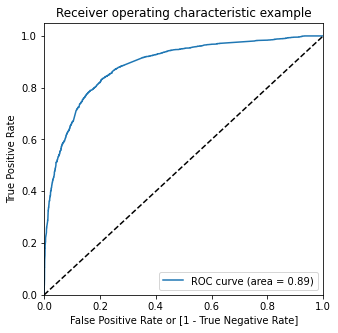

In [146]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.89 which is quite good. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

#### Lets find the optimal cutoff point

In [147]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.464526,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.078779,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.244276,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.822067,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.084177,3934,0,1,0,0,0,0,0,0,0,0,0


#### Lets check the sensitivity and specificty tradeoff

In [148]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.613636  0.968370  0.395052
0.2   0.2  0.750309  0.916058  0.648176
0.3   0.3  0.804422  0.843471  0.780360
0.4   0.4  0.818955  0.777778  0.844328
0.5   0.5  0.810606  0.669100  0.897801
0.6   0.6  0.803030  0.609084  0.922539
0.7   0.7  0.791744  0.540552  0.946527
0.8   0.8  0.763760  0.424980  0.972514
0.9   0.9  0.720779  0.287510  0.987756


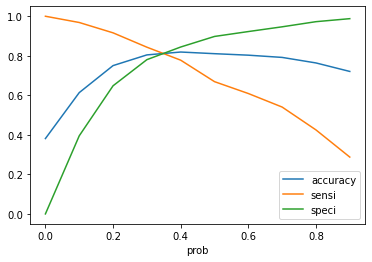

In [150]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As we can observe that around 0.35, we are getting the optimal values of the three metrics. So let's choose 0.3 as our cutoff now.

In [151]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.464526,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.078779,6795,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.244276,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.822067,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.084177,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [152]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8044217687074829

In [153]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3123,  879],
       [ 386, 2080]], dtype=int64)

In [154]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Sensitivity

In [155]:
# Calculate the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8434712084347121

#### Specificity

In [156]:
# Calculate the specificity of our logistic regression model

TN / float(TN+FP)

0.780359820089955

In [157]:
# Positive predicted value
print (TP / float(TP+FP))

0.7029401824940859


In [158]:
# Negative predictive value
print (TN / float(TN+ FN))

0.889997150185238


### Assigning Lead Score

In [159]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.464526,1871,0,1,1,1,1,1,0,0,0,0,0,1,46
1,0,0.078779,6795,0,1,0,0,0,0,0,0,0,0,0,0,8
2,0,0.244276,3516,0,1,1,1,0,0,0,0,0,0,0,0,24
3,0,0.822067,8105,1,1,1,1,1,1,1,1,1,1,0,1,82
4,0,0.084177,3934,0,1,0,0,0,0,0,0,0,0,0,0,8


### Precision and recall tradeoff

In [160]:
#Looking at the confusion matrix again

cconfusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3123,  879],
       [ 386, 2080]], dtype=int64)

#### Precision
TP / TP + FP

In [161]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7029401824940859

#### Recall
TP / TP + FN

In [162]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8434712084347121

In [164]:
# Looking at the prebuild report instead of doing manually.
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted ))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      4002
           1       0.70      0.84      0.77      2466

    accuracy                           0.80      6468
   macro avg       0.80      0.81      0.80      6468
weighted avg       0.82      0.80      0.81      6468



In [165]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

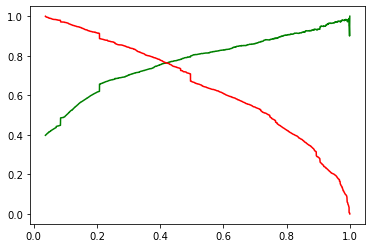

In [166]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The precision and recall tradeoff siggested a cutoff of 0.4 but we already got our expected result with the value of 0.3. So we will stick with that

### Making Predictions on the Test Set

In [167]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [168]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
4269,0,0.933036,0,0,0,0,0,1,0,1,0,0,0,0,0
2376,0,-0.900812,0,1,0,0,0,1,0,1,0,0,0,0,0
7766,0,-0.793792,0,0,0,0,0,0,0,0,0,1,0,0,1
9199,0,-0.900812,0,0,1,0,0,0,0,1,0,0,1,0,0
4359,0,-0.900812,0,1,0,0,0,0,0,0,0,0,0,0,0


In [169]:
X_test.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [170]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)

In [171]:
# Check X_test_sm

X_test_sm.head(3)

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
4269,1.0,0,0.933036,0,0,0,0,0,1,0,1,0,0,0,0,0
2376,1.0,0,-0.900812,0,1,0,0,0,1,0,1,0,0,0,0,0
7766,1.0,0,-0.793792,0,0,0,0,0,0,0,0,0,1,0,0,1


In [172]:
X_test_sm.shape

(2772, 16)

In [173]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [174]:
y_test_pred[:10]

4269    0.735011
2376    0.903655
7766    0.959070
9199    0.082898
4359    0.892180
9186    0.569638
1631    0.436512
8963    0.146846
8007    0.068153
5324    0.352912
dtype: float64

In [175]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [176]:
# Let's see the head

y_pred_1.head()

,0
4269,0.735011
2376,0.903655
7766,0.959070
9199,0.082898
4359,0.892180


In [177]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [178]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [179]:
# Removing index for both dataframes to append them alongside 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [180]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [181]:
y_pred_final.head(3)

,Converted,Prospect ID,0
0,1,4269,0.735011
1,1,2376,0.903655
2,1,7766,0.959070


In [182]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [183]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Prospect ID,Conversion_Prob
0,1,4269,0.735011
1,1,2376,0.903655
2,1,7766,0.959070
3,0,9199,0.082898
4,1,4359,0.892180


In [184]:
# Make predictions on the test set using 0.3 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [185]:
# Check y_pred_final

y_pred_final.head()

,Converted,Prospect ID,Conversion_Prob,final_predicted
0,1,4269,0.735011,1
1,1,2376,0.903655,1
2,1,7766,0.959070,1
3,0,9199,0.082898,0
4,1,4359,0.892180,1


In [186]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8077200577200577

In [187]:
confusion_t2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_t2

array([[1326,  351],
       [ 182,  913]], dtype=int64)

In [188]:
TP = confusion_t2[1,1] # true positive 
TN = confusion_t2[0,0] # true negatives
FP = confusion_t2[0,1] # false positives
FN = confusion_t2[1,0] # false negatives

#### Sensitivity

In [189]:
# Calculate sensitivity
TP / float(TP+FN)

0.8337899543378996

#### Specificity

In [190]:
# Calculate specificity
TN / float(TN+FP)

0.7906976744186046